<a href="https://colab.research.google.com/github/SebastianPerezCalle/Se-ales-y-Sistemas/blob/main/6-PotenciaEncircutiosLC_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repaso cálculo de potencia en circuitos capacitivos e inductivos

Elaborado por Santiago Tabares email: satabaresgi@unal.edu.co; Andrés Marino Álvarez email: amalavarezme@unal.edu.co



## Ejercicio propuesto en el cuaderno señales de energía y potencia

Ver [https://github.com/amalvarezme/SenalesSistemas/blob/master/1_IntroduccionSyS/5_Sen%CC%83ales_Energia_Potencia.ipynb](https://github.com/amalvarezme/SenalesSistemas/blob/master/1_IntroduccionSyS/5_Sen%CC%83ales_Energia_Potencia.ipynb)



> Graficar la potencia media de una impedancia  $R+j\omega L$ , cuándo es excitada por una fuente sinusoidal.

> Graficar la potencia media de una impedancia  $R−j\frac{1}{\omega C}$ , cuándo es excitada por una fuente sinusoidal.



#Desarrollo Ejercicios Propuestos
Graficar la potencia media de una impedancia R+jωL , cuándo es excitada por una fuente sinusoidal.

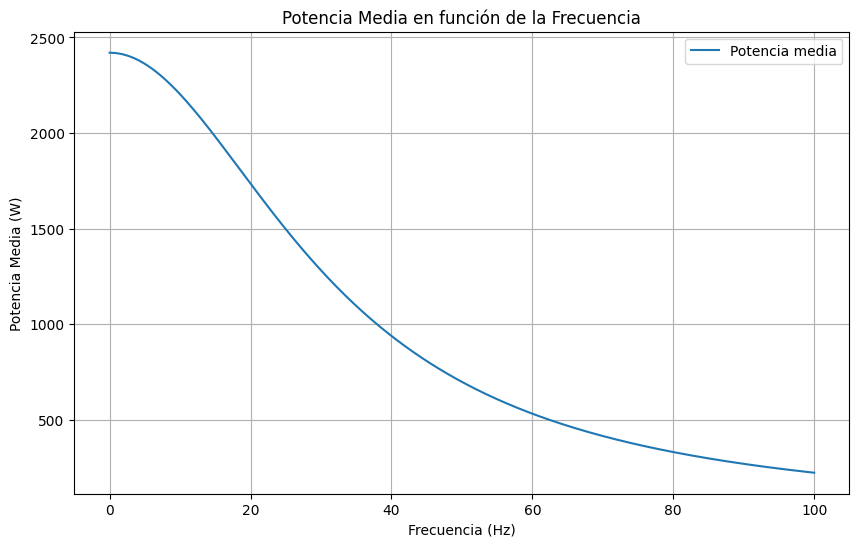

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de los parámetros
R = 10  # Resistencia en ohmios
L = 0.05  # Inductancia en henrios
Vm = 220  # Voltaje máximo en voltios

# Rango de frecuencias (en Hz)
f = np.linspace(0, 100, 500)
omega = 2 * np.pi * f

# Cálculo de la potencia media
Z = np.sqrt(R**2 + (omega * L)**2)
P_media = (Vm**2 * R) / (2 * Z**2)

# Graficar la potencia media en función de la frecuencia
plt.figure(figsize=(10, 6))
plt.plot(f, P_media, label='Potencia media')
plt.title('Potencia Media en función de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia Media (W)')
plt.grid(True)
plt.legend()
plt.show()

Graficar la potencia media de una impedancia R−j1ωC , cuándo es excitada por una fuente sinusoidal.

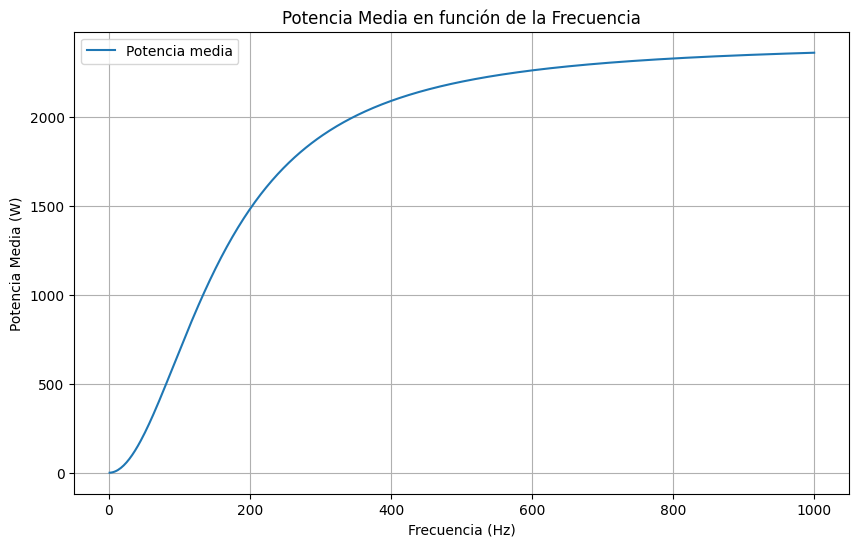

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de los parámetros
R = 10  # Resistencia en ohmios
C = 100e-6  # Capacitancia en faradios
Vm = 220  # Voltaje máximo en voltios

# Rango de frecuencias (en Hz)
f = np.linspace(1, 1000, 500)
omega = 2 * np.pi * f

# Cálculo de la potencia media
Z = np.sqrt(R**2 + (1 / (omega * C))**2)
P_media = (Vm**2 * R) / (2 * Z**2)

# Graficar la potencia media en función de la frecuencia
plt.figure(figsize=(10, 6))
plt.plot(f, P_media, label='Potencia media')
plt.title('Potencia Media en función de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia Media (W)')
plt.grid(True)
plt.legend()
plt.show()


Para determinar la potencia media primero es necesario conocer la potencia instantánea $p(t)$, que en el caso de circuitos eléctricos se definie como:

$$
p(t) = v(t)i(t)
$$

De modo que nuestro primer objetivo es determinar la corriente y la tensión circulando por la impedancia en cuestión para determinar su potencia instantánea y, consecuentemente, su potencia media.

Existen dos estrategias básicas en el tiempo para el modelado de circuitos en corriente alterna: usando funciones sinusoidales o mediante tratamiento fasorial. En este cuaderno se usarán ambos, comenzando por las funciones sinusoidales.

# Ondas sinusoidales

Se comienza suponiendo una de las dos cantidades (ya sea la tensión o la corriente) como una función sinusoidal (seno o coseno) de fase cero, de modo que la otra cantidad tendrá la misma forma pero con un desfase $\theta$. Para este caso se supondrán la corriente y la tensión de la siguiente forma:

$$
i(t) = I_{max}\sin(\omega t)
$$
$$
v(t) = V_{max}\sin(\omega t + \theta)
$$

En donde $\omega$ hace referencia a la misma frecuencia angular que aparece en $R+j\omega L$.

La impedancia con la que se quiere trabajar puede verse como un circuito serie RL:

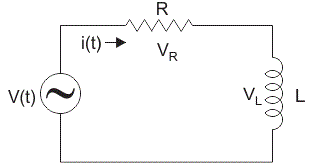

Las ecuaciones de cada elemento son:

$$v_R(t) = R i(t)$$
$$v_L(t) = L\frac{d}{dt}i(t)$$

De modo que

$$
v_R(t) = R I_{max}\sin(\omega t)
$$
$$
v_L(t) = L \frac{d}{dt}\bigg(I_{max}\sin(\omega t)\bigg) = \omega L I_{max}\cos(\omega t)
$$

Por leyes de Kirchhoff sabemos que

$$
v(t) = v_R(t) + v_L(t)\\
v(t) = R I_{max}\sin(\omega t) + \omega L I_{max}\cos(\omega t)
$$

Desde un inicio se había dicho que $v(t) = V_{max}\sin(\omega t + \theta)$, así que comparando ambas expresiones se puede determinar los valores de $V_{max}$ y $\theta$

$$
V_{max}\sin(\omega t + \theta) = R I_{max}\sin(\omega t) + \omega L I_{max}\cos(\omega t)\\
V_{max}\big(\sin(\omega t)\cos(\theta)+\sin(\theta)\cos(\omega t)\big) = R I_{max}\sin(\omega t) + \omega L I_{max}\cos(\omega t)
$$

Comparando los términos se pueden establecer las siguientes igualdades:

$$
V_{max}\cos(\theta) = RI_{max}\\
V_{max}\sin(\theta) = \omega L I_{max}
$$

Dividiendo la segunda entre la primera se puede llegar al valor de $\theta$

$$
\theta = \arctan\bigg(\frac{\omega L}{R}\bigg)
$$

Usando la identidad trigonométrica pitagórica se obtiene el valor para $V_{max}$

$$
V_{max} = \sqrt{R^2 + (\omega L)^2} I_{max}
$$

Ahora podemos determinar la tensión a partir de la corriente para un circuito serie RL

Supongamos que para el circuito serie RL, tenemos

$$L = 0.01 H\\R = 4 \Omega\\i(t) = 2\sin(300t)$$

Determinemos su potencia media a lo largo de un periodo, recordando que la potencia media se define como

$$
P = \frac{1}{T_0} \int_0^{T_0} p(t)~dt
$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

w = 300
L = 0.01
R = 4
Imax = 2
T0 = 2*np.pi/w
N = 100 #número de muestras

t = np.linspace(0, T0, N)
i = Imax*np.sin(w*t)

In [ ]:
Vmax = np.sqrt(np.square(R)+np.square(w*L))*Imax
theta = np.arctan(w*L/R)

v = Vmax*np.sin(w*t + theta)

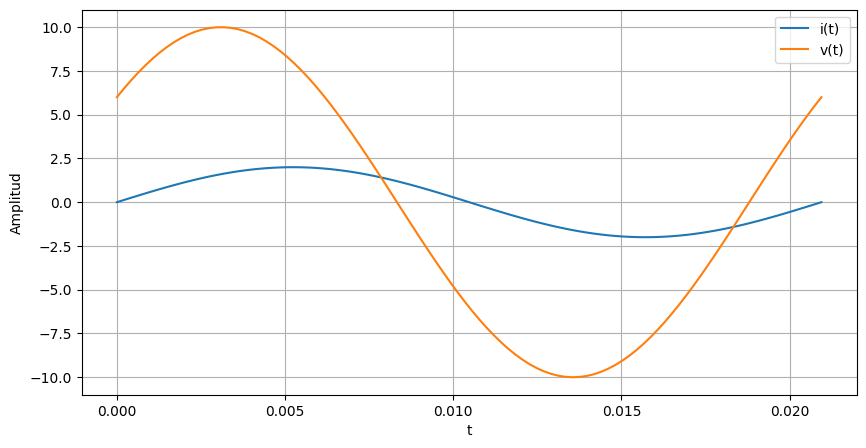

In [ ]:
#plotear la corriente y la tensión
plt.figure(figsize=[10,5])
plt.plot(t, i, label = "i(t)")
plt.plot(t, v, label = "v(t)")
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

In [ ]:
p = v*i #potencia instantanea
P = np.trapz(p, t)/T0 #Potencia media TAMBIEN SE PUEDE RESOLVER POR SYMPY
print("Potencia media: "+str(P))

Potencia media: 8.000000000000002


**NOTA**: también se puede resolver la integral anterior de forma simbólica con el paquete SYMPY

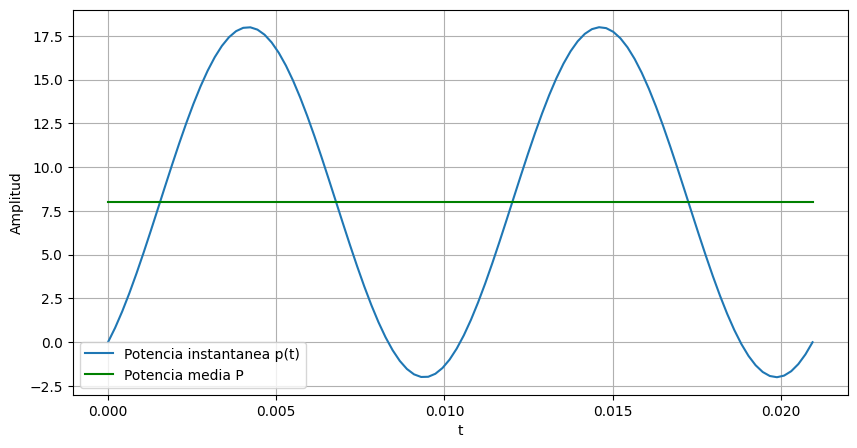

In [ ]:
#Plotear la potencia instantanea vs la potencia media
plt.figure(figsize=[10,5])
plt.plot(t, p, label = "Potencia instantanea p(t)")
plt.plot(t, P*np.ones(len(t)), "g", label = "Potencia media P")
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

Ahora observemos el circuito RC, cuya impedancia es $R - j\frac{1}{\omega C}$. Dado que la resistencia permanece igual, solo tenemos que determinar la tensión en el condensador.

$$
v_C = \frac{1}{C}\int_{-\infty}^{t}i(\tau)d\tau\\
v_C = \frac{1}{C}\int_{-\infty}^{t}I_{max}\sin(\omega \tau)d\tau\\
v_C = \frac{-I_{max}}{\omega C}\cos(\omega t)
$$

Se ve que la expresión es muy similar para el caso de un inductor, por lo que podemos utilizar todos los resultados anteriores haciendo el cambio $\omega L \rightarrow \frac{-1}{\omega C}$

Al aplicar este cambio de variables, se obtienen los siguientes resultados:

$$
\theta = \arctan\bigg(\frac{\omega L}{R}\bigg)\Bigg|_{\omega L \rightarrow\frac{-1}{\omega C}}\\
\theta = -\arctan\bigg(\frac{1}{\omega RC}\bigg)\\
V_{max} = \sqrt{R^2 + (\omega L)^2} I_{max}\Bigg|_{\omega L \rightarrow\frac{-1}{\omega C}}\\
V_{max} = \sqrt{R^2 + \bigg(\frac{1}{\omega C}\bigg)^2} I_{max}
$$

Ahora ya podemos determinar la tensión presente en la impedancia RC a partir de su corriente

Supongamos que para el circuito RC tenemos
$$
R = 4\Omega\\
C = 0.01 F\\
i(t) = 2\sin(300t)
$$

In [ ]:
C = 0.01
Vmax = np.sqrt(np.square(R)+np.square(1/(w*L)))*Imax
theta = -np.arctan(1/(w*R*C))

v = Vmax*np.sin(w*t + theta)

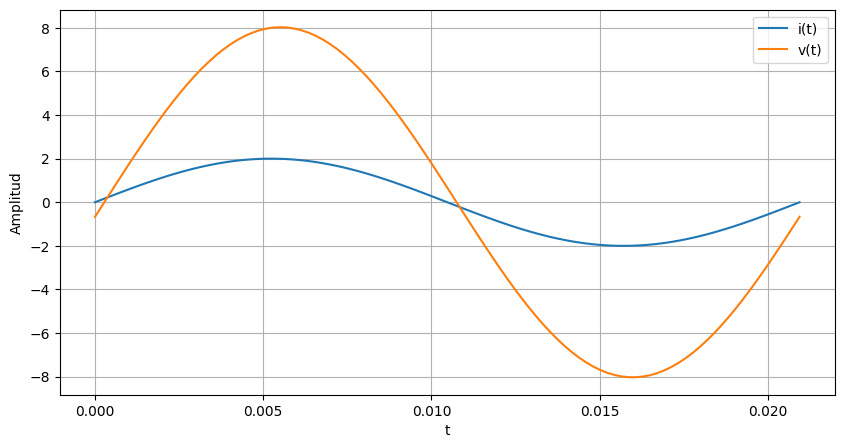

In [ ]:
plt.figure(figsize=[10,5])
plt.plot(t, i, label = "i(t)")
plt.plot(t, v, label = "v(t)")
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

In [ ]:
p = v*i #potencia instantanea
#Para integrar un array se puede usar uno de los métodos implementados por numpy, en este caso el método trapezoidal np.trapz()
P = np.trapz(p, t)/T0 #Potencia media
print("Potencia media: "+str(P))

Potencia media: 7.999999999999999


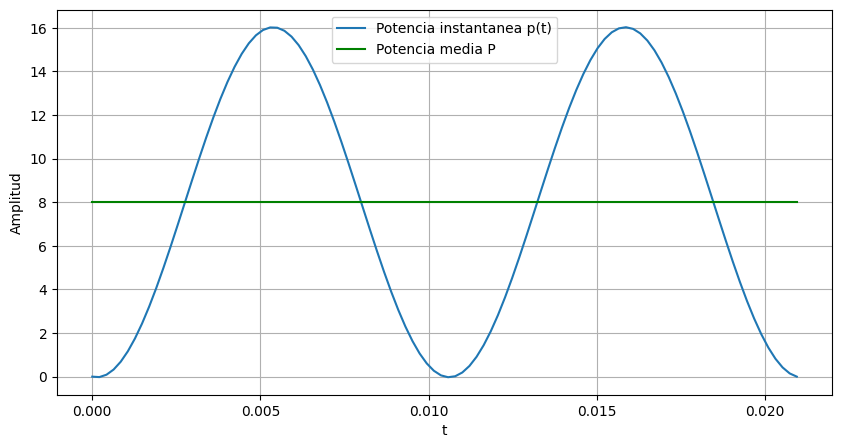

In [ ]:
plt.figure(figsize=[10,5])
plt.plot(t, p, label = "Potencia instantanea p(t)")
plt.plot(t, P*np.ones(len(t)), "g", label = "Potencia media P")
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# Tratamiento Fasorial

Una manera más sencilla de trabajar con circuitos AC es usar fasores, representación en frecuencia.

Un fasor es una cantidad compleja compuesta de dos partes: la magnitud y la fase. La magnitud es un número positivo que indica la "longitud" del fasor y la fase es el ángulo que se forma con el eje horizontal. Su interpretación es similar a la de un vector en coordenadas polares.

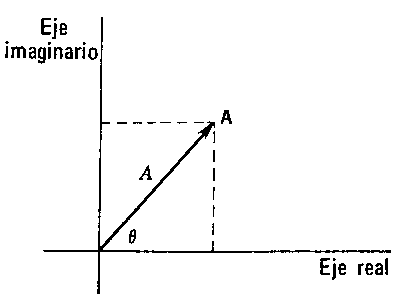

Para obtener la representación fasorial de una función sinusoidal solo es necesario observar su amplitud y su desfase. Estas dos cantidades corresponderán a la magnitud y la fase de su correspondiente fasor; conceptualmente puede entenderse al fasor como un vector que gira y que genera a la función sinusoidal, tal y como se ilustra en la imagen.

En esta ilustración hay tres fasores con diferentes amplitudes y diferentes fases, pero todos con misma velocidad angular.

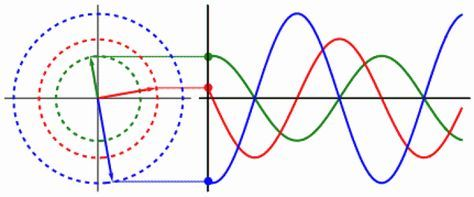

Las representaciones fasoriales de la corriente y el voltaje que se obtuvieron del inicio son como sigue:

$$
i(t) = I_{max}\sin (\omega t) \longrightarrow \bar{I} = I_{max}\angle{0^°}\\
v(t) = V_{max}\sin(\omega t + \theta) \longrightarrow \bar{V} = V_{max}\angle{\theta}
$$

Además, las inductancias y capacitancias adoptan formas simplificadas, llamadas reactancias, que nos permiten tratarlas como si de resistencias se tratasen. Las equivalencias son las siguientes:

$$
Inductancia: L\frac{d}{dt} \longrightarrow j\omega L\\
Capacitancia: \frac{1}{C}\int_{-\infty}^{t}{d\tau} \longrightarrow \frac{-j}{\omega C}
$$

De modo que si se tiene una resistencia $R$ en serie con una reactancia $j\omega L$, ambas pueden sumarse como si de resistencias puras se tratase, obteniendo entonces la impedancia $Z = R + j\omega L$. Si hubiesen estado en paralelo, se habría efectuado una suma en paralelo, como si de resistencias en paralelo se tratase, de la siguiente forma $\frac{1}{Z} = \frac{1}{R} + \frac{1}{j\omega L}$. Los mismos conceptos aplican a la capacitancia con su respectiva reactancia.

Con estos conceptos claros, la ley de Ohm puede escribirse como

$$
\bar{V} = Z \bar{I}
$$

En donde $\bar{V}$ e $\bar{I}$ son fasores y $Z$ es una impedancia.

En el ejemplo de la impedancia RL, se tiene que $\bar{I} = I_{max}\angle{0^°}$, y la impedancia es $Z = R + j\omega L$, aplicando ley de Ohm:

$$
\bar{V} = (R+j\omega L)I_{max}\angle{0^°}
$$

Al multiplicar es más útil representar los números complejos en coordenadas polares

$$
Z = R+j\omega L = \sqrt{R^2+(\omega L)^2}\angle{\arctan{\bigg(\frac{\omega L}{R}\bigg)}}\\
\bar{V} = \bigg[\sqrt{R^2+(\omega L)^2}\angle{\arctan{\bigg(\frac{\omega L}{R}\bigg)}}\bigg]I_{max}\angle{0^°}\\
\bar{V} = \sqrt{R^2+(\omega L)^2}I_{max}\angle{\arctan{\bigg(\frac{\omega L}{R}\bigg)}}
$$

Comparando se llega a la conclusión de que

$$
V_{max} = \sqrt{R^2+(\omega L)^2}I_{max}\\
\theta = \arctan{\bigg(\frac{\omega L}{R}\bigg)}
$$

Que corresponden a las mismas expresiones que se obtuvieron al trabajar con ondas.

Rehaciendo el ejemplo del circuito RL usando fasores

$$
i(t) = 2\sin{300t} \longrightarrow \bar{I} = 2\angle{0^°}\\
\omega = 300\\
L = 0.01 H\\
R = 4 \Omega\\
Z = 4 + j(300)(0.01) = 4 + j3
$$

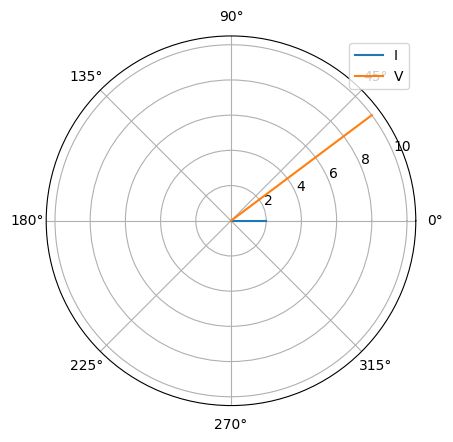

In [ ]:
import cmath #para trabajar con complejos y fasores

I = 2
Z = 4+3j
V = Z*I
N = 2

Ir = np.linspace(0, abs(I), N)
Itheta = cmath.phase(I)*np.ones(N)

Vr = np.linspace(0, abs(V), N)
Vtheta = cmath.phase(V)*np.ones(N)

ax = plt.subplot(111, projection='polar')
ax.plot(Itheta, Ir, label = 'I')
ax.plot(Vtheta, Vr, label = 'V')
ax.legend()
plt.show()

Para el circuito RC

$$
C = 0.01F\\
Z = 4 - \frac{j}{(300)(0.01)} = 4-\frac{j}{3}
$$

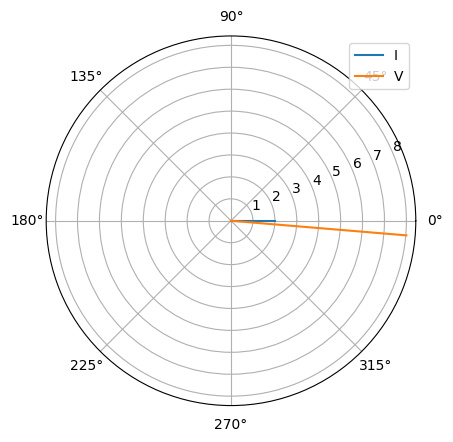

In [ ]:
Z = 4 -1j/3

V = Z*I

Ir = np.linspace(0, abs(I), N)
Itheta = cmath.phase(I)*np.ones(N)

Vr = np.linspace(0, abs(V), N)
Vtheta = cmath.phase(V)*np.ones(N)

ax = plt.subplot(111, projection='polar')
ax.plot(Itheta, Ir, label = 'I')
ax.plot(Vtheta, Vr, label = 'V')
ax.legend()
plt.show()

Para el cálculo de la potencia se usa la misma ecuación, pero se conjuga el fasor corriente

$$
\bar{P} = \bar{V}\bar{I}^*
$$

Recordar que al multiplicar números complejos, sus magnitudes se multiplican y sus ángulos se suman.

$$
\bar{P} = (V_{max}\angle{\theta})(I_{max}\angle{-0})\\
\bar{P} = V_{max}I_{max}\angle{(\theta-0)}\\
\bar{P} = V_{max}I_{max}\angle{\theta}
$$

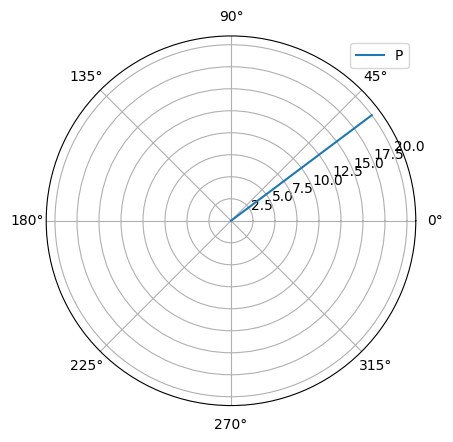

In [ ]:
I = 2
Z = 4+3j
V = Z*I

P = V*np.conjugate(I)

Pr = np.linspace(0, abs(P), N)
Ptheta = cmath.phase(P)*np.ones(N)

ax = plt.subplot(111, projection='polar')
ax.plot(Ptheta, Pr, label = 'P')
ax.legend()
plt.show()